In [7]:
from random import choices
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
import random
import os
import dill
import sys
eps = sys.float_info.epsilon

In [8]:
plt.style.use(['dark_background'])
# plt.rcParams['figure.figsize'] = (6.4,4.8)

In [9]:
os.getcwd()
# os.chdir(r'C:\Users\sherw\OneDrive\Desktop\EC_HW4')

'C:\\Users\\sherw\\AAA_Term3_EvolComp_HWs\\HW4'

In [10]:
# dill.dump_session('notebook_env.db')
# dill.load_session('notebook_env.db')

In [144]:
evals = 40000
genes = 1000
repeat = 3
tau = 0.001
lamb = np.arange(1,11)
sigma = np.tile(0.01,(repeat,1))
parent = np.tile(np.random.uniform(low = -10, high= 10, size = (genes)),(repeat,1))
parent = np.append(parent, sigma, axis = 1)
parent = parent[:,np.newaxis,:]

In [145]:
def get_childs(par,n):
    sig = par[:,:,-1]
    xi = par[:,:,:-1]
    new_sig = sig*(np.e**((-tau)*np.random.normal(0,1,size = (repeat,n))))
    sig = np.tile(new_sig.T,(genes,1,1)).T
    xi = np.repeat(xi[:,:,:],n, axis=1)
    xi = xi + sig*np.random.normal(0,1,size = (repeat,n,genes))
    sig = sig[:,:,0]
    childs = np.append(xi,sig[:, :, np.newaxis],axis = 2)
    return childs

In [146]:
def get_parent(childs, method, n, par):
    
    #Fitness proportionate selection:
    if method == 'and':
        sums = (np.sum(np.square(childs[:,:,:-1]),axis = 2))
        indx = np.argmin(sums,axis = 1)
        final = childs[np.arange(len(childs)), indx][:,np.newaxis]
        
#         fitness = sums - np.min(sums,axis = 1)[:,np.newaxis] + eps
#         probs = (fitness/((np.sum(fitness,axis = 1) + eps)[:,np.newaxis]))
#         probs = probs/((np.sum(probs,axis = 1)[:,np.newaxis]))
#         final = np.array([childs[i][np.random.choice(len(childs[i]), p = probs[i])] for i in range(len(childs))])
#         final = final[:,np.newaxis,:]
        
    #Q-tournament
    if method == 'or':
        childs = np.append(childs,par,axis = 1)
        if n > 1 and n <= 4:
            q = 2
        elif n >= 5:
            q = 4
        elif n == 1:
            q = 1
        
        indexes = np.random.choice(childs.shape[1], (repeat,q))
        selected = childs[np.arange(len(childs))[:,np.newaxis],indexes]
        fitness = np.sum(np.square(selected[:,:,:-1]),axis = 2)
        argmin = np.argmin(fitness,axis = 1)
        final = selected[np.arange(len(selected))[:,np.newaxis],argmin[:,np.newaxis]]
        
    return final

# ES(1+λ):

In [ ]:
costs = []
index = 0
for lam in lamb:
    print(lam)
    costs.append([])
    new_parent = np.copy(parent)
    for i in range(evals):
        children = get_childs(new_parent,lam)
        new_parent = get_parent(children,'or',lam,new_parent)
        cost = np.mean(np.sum(np.square(new_parent[:,:,:-1]),axis = 2))
        costs[index].append(cost)
    index += 1
costs = np.array(costs)

In [153]:
%matplotlib inline

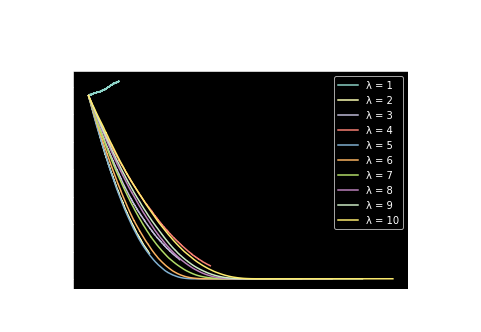

In [154]:
for i in range(len(costs)):
    out1 = np.repeat(costs[i,:],(i+1))
    plt.plot(np.arange(len(out1)),out1,label = 'λ = {}'.format(i+1))
plt.title('ES(1+λ)\nSigma = {}, Tau = {}\nIterations = {}, Genes = {}, repeat = {}'.format(0.01,0.001,evals,genes,repeat),size = 20)
plt.xlabel('Evaluations',size = 15)
plt.ylabel('Cost',size = 15)
plt.legend()

# ES(1,λ):

In [ ]:
costs2 = []
index = 0
for lam in lamb:
#     if lam <= 6 or lam >= 9:
#         continue
    print(lam)
    costs2.append([])
    new_parent = np.copy(parent)
    for i in range(evals):
        children = get_childs(new_parent,lam)
        new_parent = get_parent(children,'and',lam,new_parent)
        cost2 = np.mean(np.sum(np.square(new_parent[:,:,:-1]),axis = 2))
        costs2[index].append(cost2)
    index += 1
costs2 = np.array(costs2)

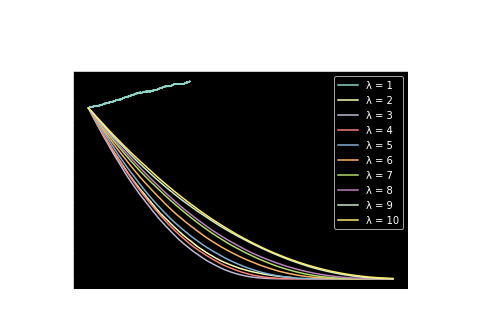

In [158]:
for i in range(len(costs2)):
    out2 = np.repeat(costs2[i,:],(i+1))[:120000]
    plt.plot(np.arange(len(out2)),out2,label = 'λ = {}'.format(i+1))
plt.title('ES(1,λ)\nSigma = {}, Tau = {}\nIterations = {}, Genes = {}, repeat = {}'.format(0.01,0.001,evals,genes,repeat),size = 20)
plt.xlabel('Evaluations',size = 15)
plt.ylabel('Cost',size = 15)
plt.legend()